<a href="https://colab.research.google.com/github/se-an-alytics/FTF_BI_Challenge/blob/main/FundThatFlip_Business_Intelligence_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

import io
city_df = pd.read_csv(io.BytesIO(uploaded['MarketHealthIndex_City.csv']), encoding= 'unicode_escape')
#county_df = pd.read_csv(io.BytesIO(uploaded['MarketHealthIndex_County.csv']), encoding= 'unicode_escape')
#metro_df = pd.read_csv(io.BytesIO(uploaded['MarketHealthIndex_Metro.csv']), encoding= 'unicode_escape')
#state_df = pd.read_csv(io.BytesIO(uploaded['MarketHealthIndex_State.csv']))
#zip_df = pd.read_csv(io.BytesIO(uploaded['MarketHealthIndex_Zip.csv']), encoding= 'unicode_escape')

# Dataset is now stored in a Pandas Dataframe

Saving MarketHealthIndex_City.csv to MarketHealthIndex_City.csv


In [ ]:
#zip_df.shape #14,089 rows and 19 columns
#county_df.shape #1,375 rows and 19 columns
#metro_df.shape #631 rows and 19 columns
#state_df.shape #48 rows and 19 columns
city_df.shape # 10,958 rows and 19 columns

(48, 19)

In [ ]:
#state_df.isnull().sum().sum() # ~30.9% of missing data
#metro_df.isnull().sum().sum() # ~23.3% of missing data
#county_df.isnull().sum().sum() # ~28.5% of missing data
#zip_df.isnull().sum().sum() # ~22.5% of missing data
city_df.isnull().sum().sum() # ~19% of missing data

39608

In [ ]:
#state_df.isnull().sum()
#metro_df.isnull().sum()
#county_df.isnull().sum()
#zip_df.isnull().sum()
city_df.isnull().sum()

RegionType                  0
RegionName                  0
City                        0
State                       0
Metro                     545
CBSATitle                 545
SizeRank                   79
MarketHealthIndex           0
SellForGain              3812
PrevForeclosed           9541
ForeclosureRatio         8671
ZHVI                       79
MoM                        79
YoY                        79
ForecastYoYPctChange     2408
StockOfREOs             10958
NegativeEquity           1353
Delinquency              1353
DaysOnMarket              106
dtype: int64

In [ ]:
city_df = city_df[['RegionType' ,'RegionName', 'State', 'MarketHealthIndex', 'SellForGain', 'PrevForeclosed', 'ForeclosureRatio', 
                   'ZHVI', 'MoM', 'YoY', 'ForecastYoYPctChange', 'NegativeEquity', 'Delinquency', 'DaysOnMarket']]
city_df = city_df.dropna()
city_df

drop_columns = ['RegionType', 'RegionName', 'State', 'MarketHealthIndex']
city_train = city_df.drop(columns=drop_columns)
city_train

,SellForGain,PrevForeclosed,ForeclosureRatio,ZHVI,MoM,YoY,ForecastYoYPctChange,NegativeEquity,Delinquency,DaysOnMarket
0,95.73,1.0234,0.0254,693900.0,0.872220,14.335146,0.054813,0.067888,0.099894,153.0
1,96.37,3.4373,1.0175,633400.0,0.300871,7.101792,0.017052,0.054472,0.031304,66.0
3,87.60,7.2419,5.6924,140300.0,1.007919,7.181054,0.032815,0.148187,0.074887,84.0
4,88.21,5.9816,0.4927,218600.0,0.598251,9.683894,0.038070,0.112509,0.020693,64.0
5,81.94,6.9234,1.7300,227000.0,1.023587,11.383710,0.059022,0.162197,0.064402,60.0
...,...,...,...,...,...,...,...,...,...,...
7380,83.33,27.2796,2.2066,99200.0,0.100908,-0.201207,0.039647,0.214063,0.043659,80.0
8073,66.67,14.2857,2.1673,297600.0,-0.033591,3.369225,0.033269,0.094488,0.154762,84.0
9257,75.00,6.0913,3.0367,296000.0,0.475221,9.346140,0.042365,0.162466,0.029619,101.5
9978,88.89,11.7309,9.7939,146100.0,0.828157,2.382621,0.034887,0.125098,0.047917,63.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
city_scaled = pd.DataFrame(scaler.fit_transform(city_train))
city_scaled.columns=city_train.columns

In [ ]:
from sklearn.decomposition import PCA
n_components=city_train.shape[1]
pca = PCA(n_components=n_components, random_state=123)
pca.fit(city_scaled)

PCA(n_components=10, random_state=123)

In [ ]:
import numpy as np
explained_variance_ratio = pca.explained_variance_ratio_ 
cum_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
lst = []
for i in range (0, n_components):
    lst.append([i, round(explained_variance_ratio[i],6), cum_explained_variance_ratio[i]])

pca_predictor = pd.DataFrame(lst)
pca_predictor.columns = ['Component', 'Explained Variance', 'Cumulative Explained Variance']
pca_predictor

,Component,Explained Variance,Cumulative Explained Variance
0,0,0.419183,0.419183
1,1,0.199005,0.618188
2,2,0.096325,0.714513
3,3,0.083370,0.797883
4,4,0.055916,0.853799
5,5,0.038592,0.892391
6,6,0.037562,0.929953
7,7,0.031525,0.961478
8,8,0.021085,0.982564
9,9,0.017436,1.000000


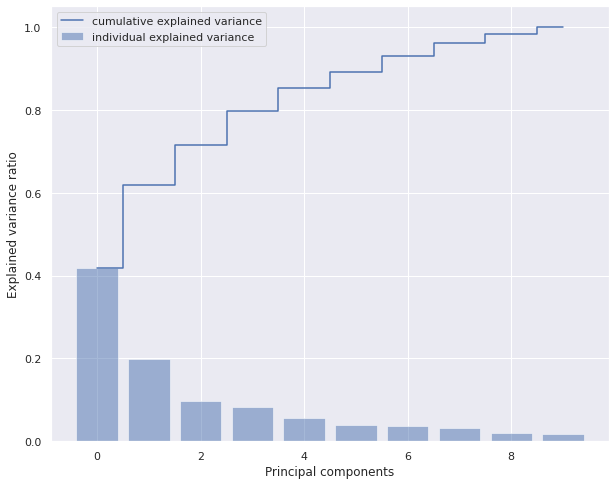

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,8))

plt.bar(pca_predictor['Component'],pca_predictor['Explained Variance'], align='center', alpha=0.5, 
       label='individual explained variance')
plt.step(pca_predictor['Component'],pca_predictor['Cumulative Explained Variance'], where='mid',
         label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio');
plt.legend(loc='best')

In [ ]:
pca = PCA(n_components=3)
pca.fit(city_scaled)

PCA(n_components=3)

In [ ]:
city_transformed = pca.fit_transform(city_scaled)
city_transformed.shape

(951, 3)

[3 4 3 0 0 4 4 4 0 3 0 0 3 4 4 0 1 0 4 4 4 0 0 4 4 1 4 3 4 4 4 4 4 0 4 0 1
 4 1 0 4 0 4 0 3 0 0 0 0 1 4 0 0 4 4 1 1 4 0 4 4 1 4 0 0 4 1 4 0 3 4 3 4 0
 1 3 0 4 0 0 3 4 1 0 4 0 0 0 1 3 0 4 4 4 4 0 2 4 3 1 0 0 4 1 3 4 1 4 0 3 0
 0 4 3 0 4 1 4 4 2 3 0 4 0 4 4 1 0 3 4 4 4 0 4 0 4 4 4 4 4 4 4 0 0 4 1 4 1
 0 0 0 1 4 4 4 4 4 4 0 4 0 4 3 1 4 1 4 4 1 0 4 1 1 0 1 0 0 4 0 0 1 4 4 1 0
 4 4 3 2 4 1 3 3 3 0 4 1 4 4 0 4 1 3 0 1 4 1 0 4 4 0 0 4 1 4 1 4 4 0 0 4 0
 4 4 0 1 4 1 4 4 4 4 0 1 0 0 0 4 3 1 0 4 0 4 0 4 2 4 4 0 4 4 4 1 4 3 0 1 0
 0 0 4 4 1 1 0 0 4 4 0 4 1 3 0 0 0 4 4 1 4 4 1 4 4 1 1 0 0 3 1 1 1 0 1 3 4
 4 4 4 2 4 4 4 1 1 1 3 1 0 4 4 4 1 0 4 1 1 0 4 4 4 4 4 4 0 0 1 1 3 1 0 1 0
 1 4 1 4 0 4 3 4 1 0 4 1 4 4 3 3 4 4 3 0 3 4 1 0 0 4 4 4 4 2 4 1 4 4 4 3 1
 0 1 2 4 1 4 4 3 1 0 0 0 4 1 0 4 4 0 3 0 0 1 4 0 4 0 4 4 0 3 0 3 0 1 1 3 0
 3 0 4 3 0 2 4 4 0 2 3 0 4 1 1 3 4 1 4 4 0 1 1 4 4 4 4 2 4 4 3 0 2 4 3 0 3
 1 4 4 4 4 1 1 3 4 0 0 0 3 3 0 4 4 0 1 3 3 0 1 4 0 3 0 2 1 3 1 4 1 1 1 1 3
 1 4 4 4 3 0 4 0 0 3 4 1 

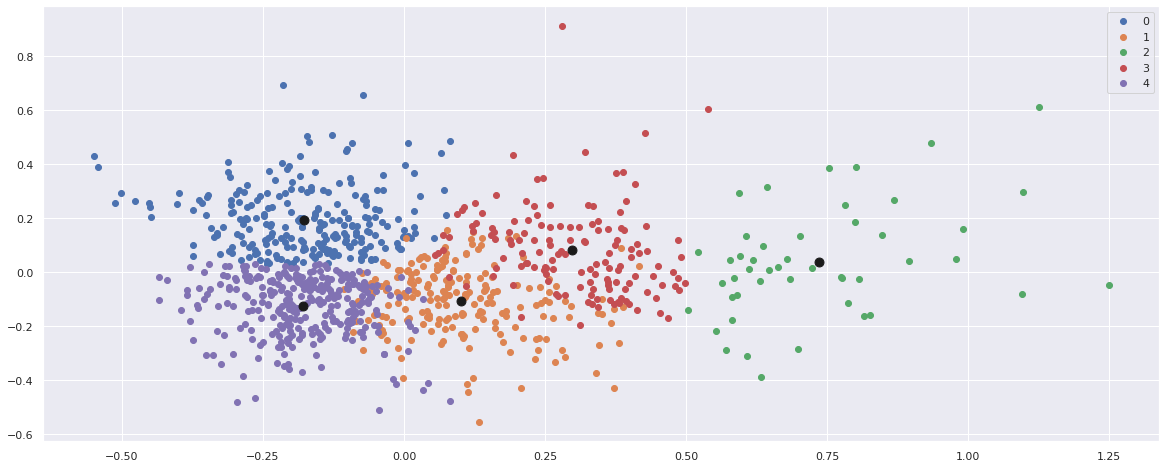

In [ ]:
from sklearn.cluster import KMeans

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=123)
kmeans.fit(city_transformed)
label = kmeans.fit_predict(city_transformed)
print(label)

 
#plotting the results:
 
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
plt.subplots(figsize=(20,8))
for i in u_labels:
    plt.scatter(city_transformed[label == i , 0] , city_transformed[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
cluster_labels = kmeans.labels_
city_df['cluster'] = cluster_labels
city_df

,RegionType,RegionName,State,MarketHealthIndex,SellForGain,PrevForeclosed,ForeclosureRatio,ZHVI,MoM,YoY,ForecastYoYPctChange,NegativeEquity,Delinquency,DaysOnMarket,cluster
0,City,New York,NY,9.771856,95.73,1.0234,0.0254,693900.0,0.872220,14.335146,0.054813,0.067888,0.099894,153.0,3
1,City,Los Angeles,CA,7.555211,96.37,3.4373,1.0175,633400.0,0.300871,7.101792,0.017052,0.054472,0.031304,66.0,4
3,City,Philadelphia,PA,3.395693,87.60,7.2419,5.6924,140300.0,1.007919,7.181054,0.032815,0.148187,0.074887,84.0,3
4,City,Phoenix,AZ,8.481475,88.21,5.9816,0.4927,218600.0,0.598251,9.683894,0.038070,0.112509,0.020693,64.0,0
5,City,Las Vegas,NV,5.551195,81.94,6.9234,1.7300,227000.0,1.023587,11.383710,0.059022,0.162197,0.064402,60.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,City,Forestdale,AL,1.096003,83.33,27.2796,2.2066,99200.0,0.100908,-0.201207,0.039647,0.214063,0.043659,80.0,3
8073,City,Shady Side,MD,1.252966,66.67,14.2857,2.1673,297600.0,-0.033591,3.369225,0.033269,0.094488,0.154762,84.0,3
9257,City,Vail,AZ,6.572367,75.00,6.0913,3.0367,296000.0,0.475221,9.346140,0.042365,0.162466,0.029619,101.5,1
9978,City,Clay,AL,1.042161,88.89,11.7309,9.7939,146100.0,0.828157,2.382621,0.034887,0.125098,0.047917,63.0,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



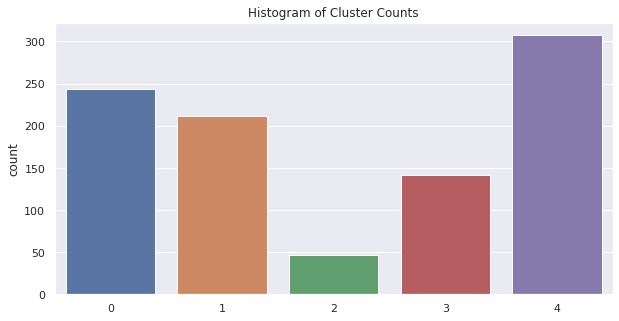

In [ ]:
import seaborn as sns
ax=plt.subplots(figsize=(10,5))
ax=sns.countplot(cluster_labels)
title="Histogram of Cluster Counts"
ax.set_title(title, fontsize=12)
plt.show()

In [ ]:
# function used to compare clusters' measures
def cluster_stats(columns):
    output = pd.DataFrame({'cluster':[ i for i in range(n_clusters)]})
    for column in columns:
        lst = []
        for i in range(n_clusters):
            mean = city_df[city_df['cluster'] == i].describe()[column]['mean']
            lst.append([i, round(mean,2)])
        df = pd.DataFrame(lst)
        df.columns = ['cluster', column]
        output = pd.merge(output, df, on='cluster', how='outer')
    return output

In [ ]:
columns = city_train.columns
cluster_comparisons = cluster_stats(columns)

In [ ]:
cluster_comparisons

,cluster,SellForGain,PrevForeclosed,ForeclosureRatio,ZHVI,MoM,YoY,ForecastYoYPctChange,NegativeEquity,Delinquency,DaysOnMarket
0,0,93.00,5.85,2.77,286744.26,0.71,9.94,0.05,0.09,0.03,60.61
1,1,76.92,4.63,2.14,268467.30,0.33,3.29,0.03,0.11,0.04,86.02
2,2,64.84,13.12,8.62,170631.91,0.29,2.81,0.02,0.21,0.14,125.01
3,3,80.28,10.69,5.12,208357.75,0.53,5.27,0.03,0.15,0.09,93.35
4,4,93.29,3.45,1.32,455320.52,0.34,5.31,0.02,0.06,0.02,64.11


In [ ]:
print('cluster 0 avg mhi:', cluster_0['MarketHealthIndex'].mean())
print('cluster 1 avg mhi:', cluster_1['MarketHealthIndex'].mean())
print('cluster 2 avg mhi:', cluster_2['MarketHealthIndex'].mean())
print('cluster 3 avg mhi:', cluster_3['MarketHealthIndex'].mean())
print('cluster 4 avg mhi:', cluster_4['MarketHealthIndex'].mean())

cluster 0 avg mhi: 7.1446865677893845
cluster 1 avg mhi: 4.013506114254426
cluster 2 avg mhi: 0.7653594187477912
cluster 3 avg mhi: 2.106410134469897
cluster 4 avg mhi: 7.03735554111553


In [ ]:
cluster_0 = city_df[city_df['cluster'] == 0] #healthiest and most desirable
cluster_1 = city_df[city_df['cluster'] == 1] #the median group
cluster_2 = city_df[city_df['cluster'] == 2] #missed payments/least desirable
cluster_3 = city_df[city_df['cluster'] == 3] #paint scorers (all bigs minus GP2)
cluster_4 = city_df[city_df['cluster'] == 4] #volume-shooters

In [ ]:
cluster_0[['State']].nunique() # 20 states
cluster_1[['State']].nunique() # 22 states
cluster_2[['State']].nunique() # 6 states
cluster_3[['State']].nunique() # 20 states
cluster_4[['State']].nunique() # 24 states

State    24
dtype: int64

In [ ]:
cluster_3.corr()

,MarketHealthIndex,SellForGain,PrevForeclosed,ForeclosureRatio,ZHVI,MoM,YoY,ForecastYoYPctChange,NegativeEquity,Delinquency,DaysOnMarket,cluster
MarketHealthIndex,1.000000,0.312515,-0.180017,-0.193763,0.200664,0.302283,0.553057,0.513687,-0.172898,-0.101013,0.353174,NaN
SellForGain,0.312515,1.000000,0.080941,0.087104,0.203729,-0.025080,0.045461,0.179164,-0.147329,0.091325,0.108429,NaN
PrevForeclosed,-0.180017,0.080941,1.000000,-0.068396,-0.307975,0.178167,0.068745,0.177484,0.315908,-0.352799,-0.392090,NaN
ForeclosureRatio,-0.193763,0.087104,-0.068396,1.000000,-0.192039,0.024586,0.176778,0.054890,0.001542,-0.041725,-0.234091,NaN
ZHVI,0.200664,0.203729,-0.307975,-0.192039,1.000000,-0.225917,-0.019378,-0.068319,-0.486036,0.445912,0.330928,NaN
MoM,0.302283,-0.025080,0.178167,0.024586,-0.225917,1.000000,0.319365,0.089076,0.181416,-0.257778,-0.046183,NaN
YoY,0.553057,0.045461,0.068745,0.176778,-0.019378,0.319365,1.000000,0.584804,0.194320,-0.025985,-0.044490,NaN
ForecastYoYPctChange,0.513687,0.179164,0.177484,0.054890,-0.068319,0.089076,0.584804,1.000000,0.280788,-0.173822,-0.161349,NaN
NegativeEquity,-0.172898,-0.147329,0.315908,0.001542,-0.486036,0.181416,0.194320,0.280788,1.000000,-0.309953,-0.138385,NaN
Delinquency,-0.101013,0.091325,-0.352799,-0.041725,0.445912,-0.257778,-0.025985,-0.173822,-0.309953,1.000000,0.295117,NaN


In [ ]:
cluster_0[['State']].value_counts()

In [ ]:
cluster_1[['State']].value_counts()

In [ ]:
cluster_2[['State']].value_counts()

In [ ]:
cluster_3[['State']].value_counts()

In [ ]:
cluster_4[['State']].value_counts()

State
CA       142
MN        30
OH        24
VA        18
OR        11
NC        10
TN         9
AZ         8
CO         8
WI         7
PA         6
WA         5
MD         5
OK         4
NJ         4
RI         3
SC         3
MO         3
NV         2
AR         1
NE         1
DC         1
CT         1
AL         1
dtype: int64

In [ ]:
# testing to see how many cities are found in any given cluster of the 90th percentile of delinquency
city_MHI = city_df[['Delinquency']]
ninety_fifth_percentile = np.percentile(city_MHI, 90) #9.373517065157875
nine_five_df = city_df[(city_df['Delinquency'] >= ninety_fifth_percentile) & (city_df['cluster'] == 3)]
nine_five_df[['RegionName', 'State', 'Delinquency', 'cluster']]
nine_five_df[['State']].value_counts()

State
NJ       32
MD        8
DE        3
CT        2
NY        2
PA        2
CO        1
MA        1
RI        1
WA        1
dtype: int64

In [ ]:
cluster_0.corr() #highest corr coeff: ZHVI (0.42)
cluster_1.corr() #highest corr coeff: MoM (0.36)
cluster_2.corr() #highest corr coeff: YoY (0.62)
cluster_3.corr() #highest corr coeff: YoY (0.55)
cluster_4.corr() #highest corr coeff: YoY (0.48)

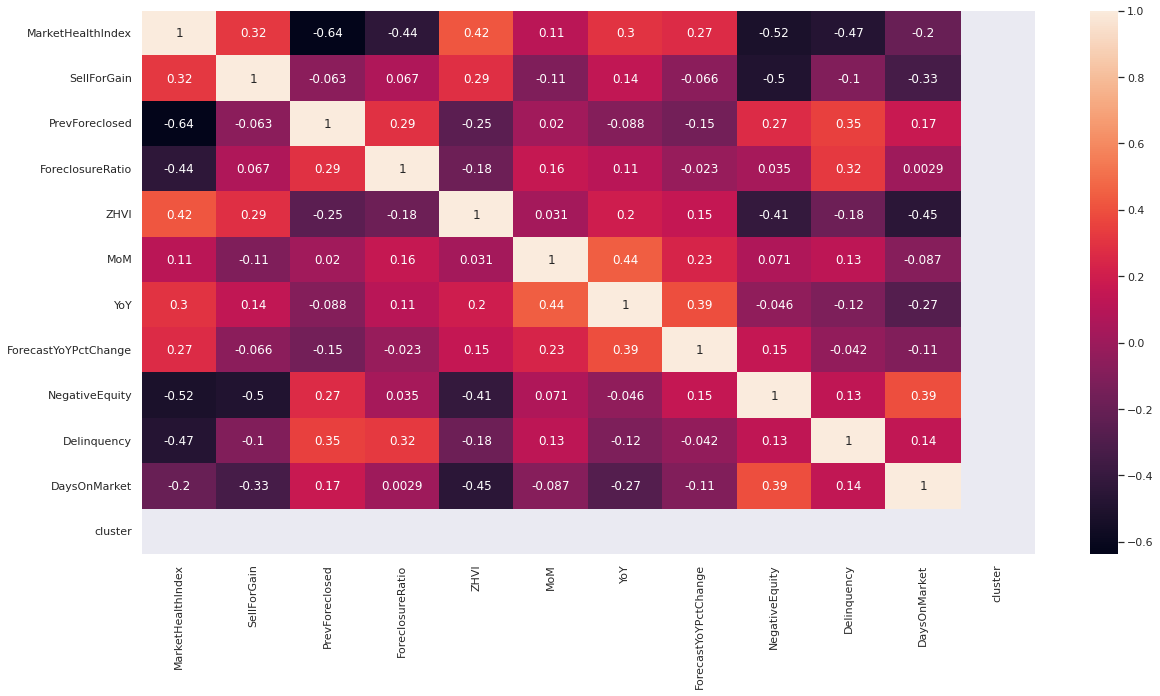

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(cluster_0.corr(), annot=True)

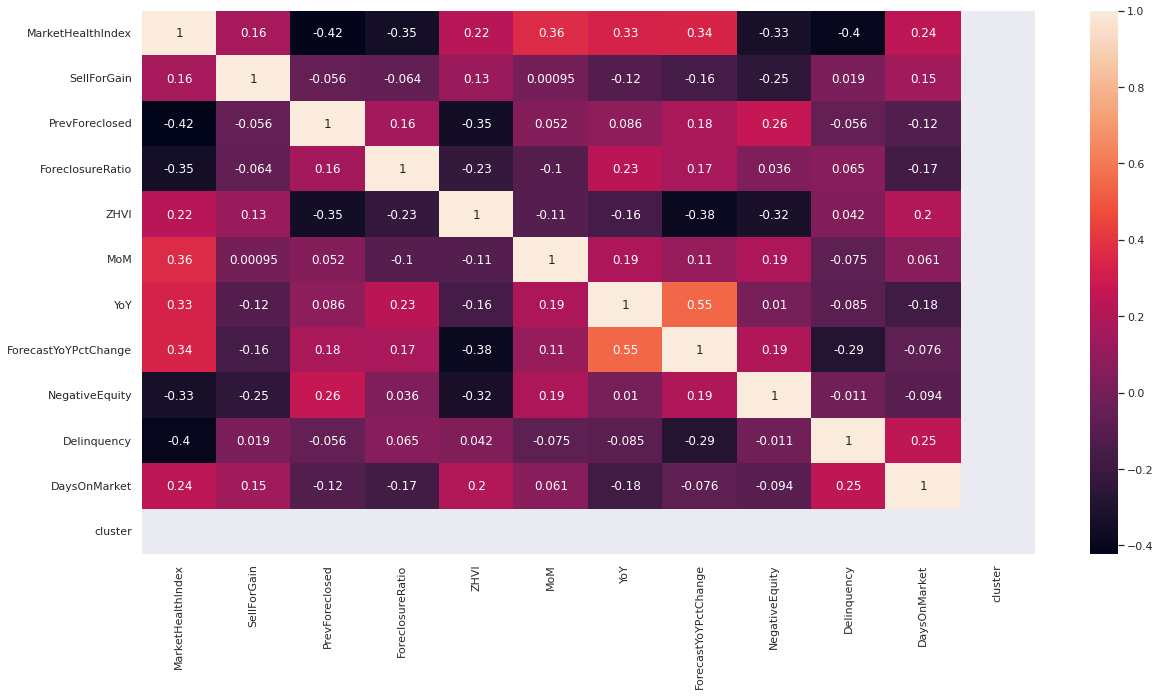

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(cluster_1.corr(), annot=True)

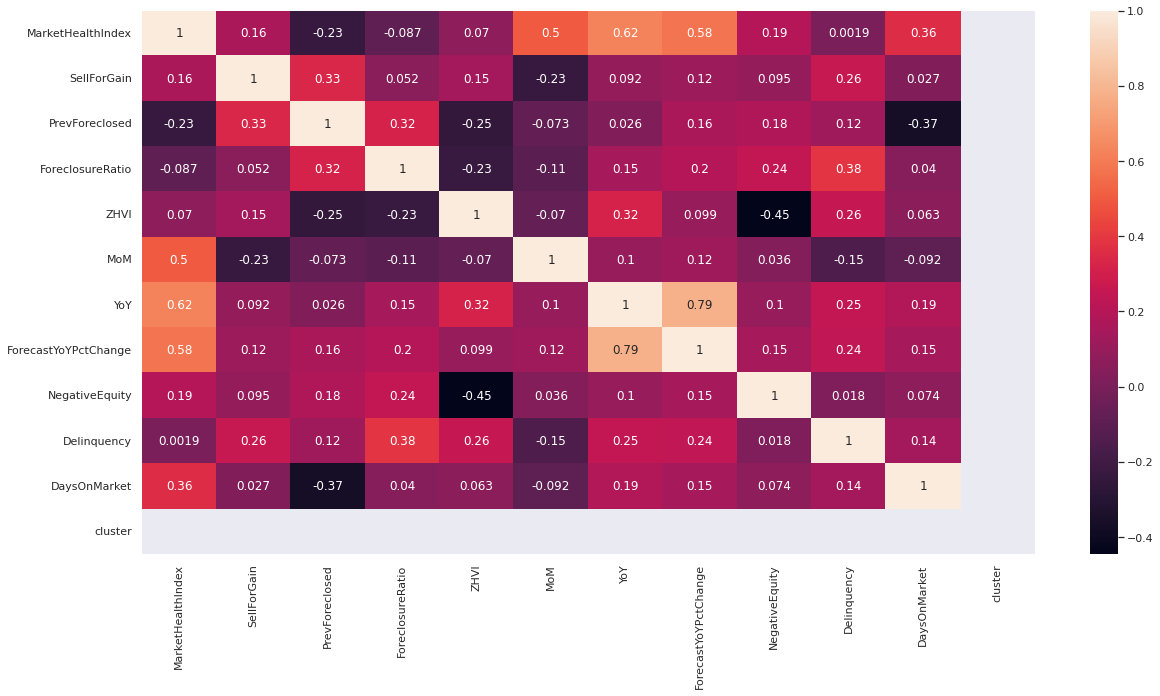

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(cluster_2.corr(), annot=True)

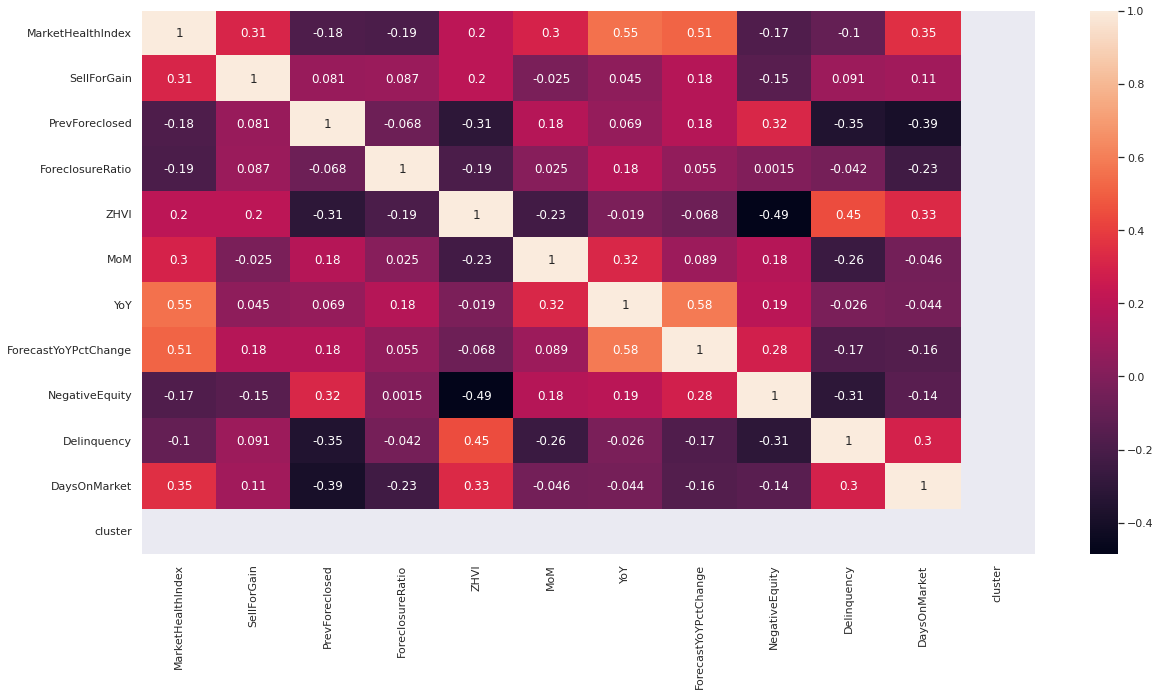

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(cluster_3.corr(), annot=True)

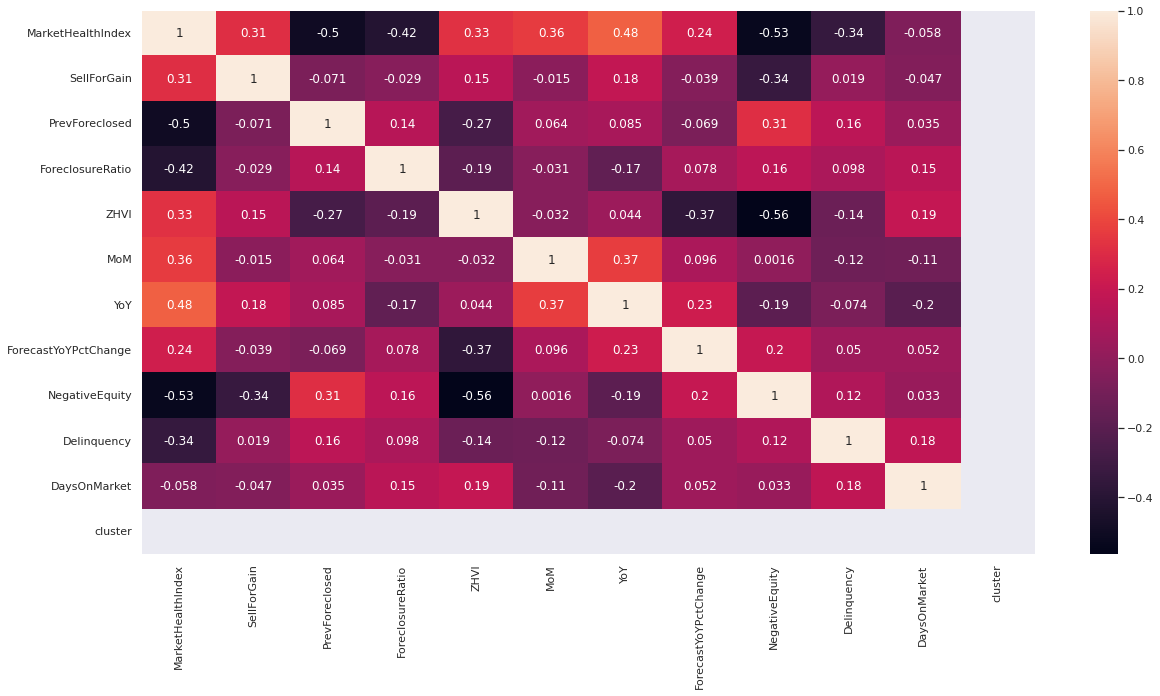

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(cluster_4.corr(), annot=True)

In [ ]:
import plotly.express as px
px.scatter(data_frame=city_df, x='MarketHealthIndex', y='cluster', color='cluster',
           log_x=True, hover_data=['State', 'MarketHealthIndex', 'SellForGain', 'ForecastYoYPctChange', 'NegativeEquity', 'Delinquency', 'DaysOnMarket'], #trendline="ols", trendline_scope="overall",
           title='Market Health Index v. Cluster')

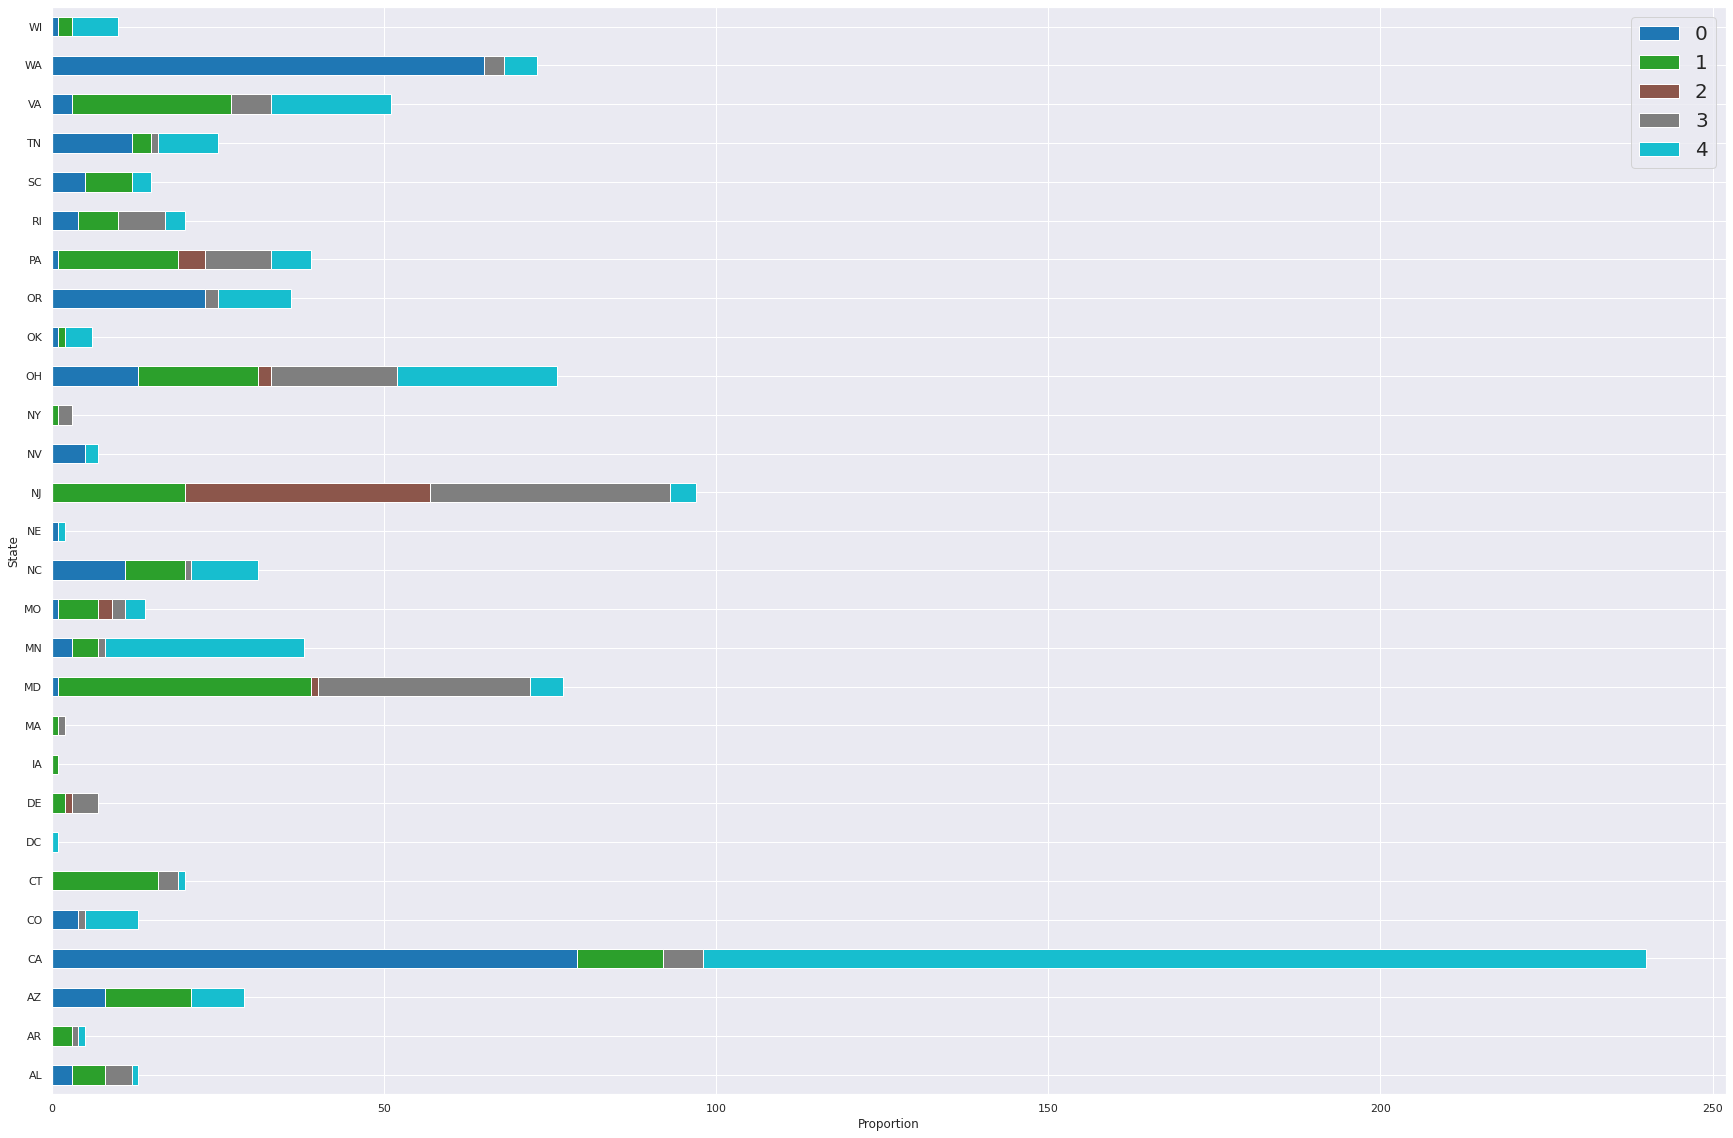

In [ ]:
cross_tab = pd.crosstab(index=city_df['State'],
                        columns=city_df['cluster'])
cross_tab

cross_tab.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(30, 20))

plt.legend(loc="upper right", ncol=1, fontsize=20)
plt.xlabel("Proportion")
plt.ylabel("State")
plt.xticks(rotation=360)
plt.show()